In [1]:
# ипрортируем библиотеки

import numpy as np
import pandas as pd


In [2]:
# загружаем набор данных
data_reg = pd.read_excel('C://Users/alex1/Downloads/ПЗ.Метрики.xlsx', sheet_name='Regression')
data_copy_reg = data_reg.copy()
data_copy_reg
#Посмотрел датафрейм с регрессией

,model,part,Y_true,Y_pred
0,LinReg,train,1341,1342
1,Polynominal Reg,train,1648,1648
2,LinReg,train,1691,1684
3,Polynominal Reg,test,1677,1709
4,LinReg,test,1434,1454
...,...,...,...,...
5195,Polynominal Reg,train,658,695
5196,Polynominal Reg,train,980,1003
5197,LinReg,test,400,421
5198,LinReg,train,572,578


In [3]:
data_bc = pd.read_excel('C://Users/alex1/Downloads/ПЗ.Метрики.xlsx', sheet_name='Binary Classification')
data_copy_bc = data_bc.copy()
data_copy_bc
#Посмотрел датафрейм с классификацией

,model,part,Y_true,Y_pred_proba_1,Y_pred_proba_0,Y_pred
0,GradientBoosting,train,1,0.40,0.60,0
1,GradientBoosting,train,1,0.04,0.96,0
2,GradientBoosting,train,1,0.90,0.10,1
3,GradientBoosting,train,0,0.35,0.65,0
4,GradientBoosting,test,1,1.00,0.00,1
...,...,...,...,...,...,...
5195,DecisionTree,test,0,0.11,0.89,0
5196,GradientBoosting,test,1,0.21,0.79,0
5197,GradientBoosting,train,0,0.31,0.69,0
5198,GradientBoosting,train,0,0.33,0.67,0


In [4]:
data_copy_reg.info()
#Посмотрел данные, нулевых нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   5200 non-null   object
 1   part    5200 non-null   object
 2   Y_true  5200 non-null   int64 
 3   Y_pred  5200 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 162.6+ KB


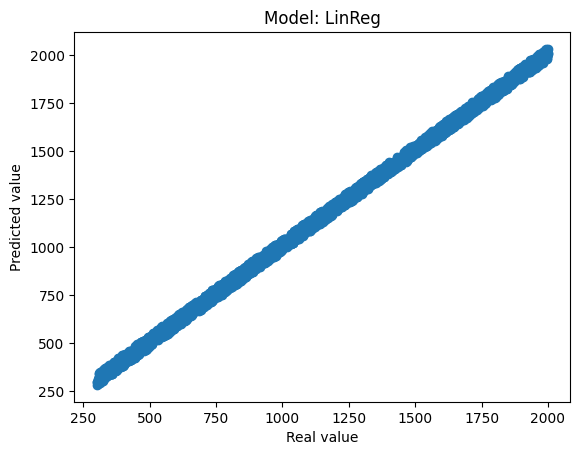

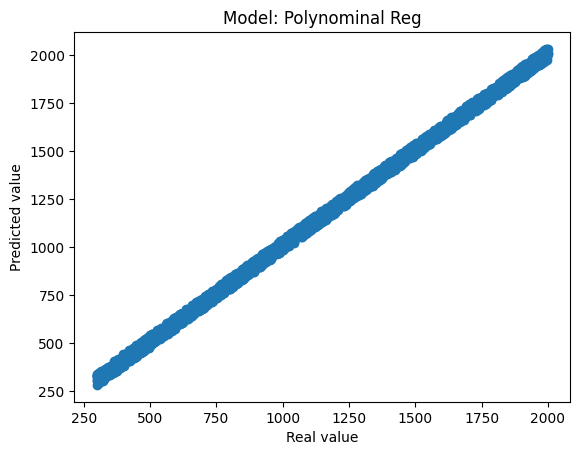

In [6]:
# 1
from sklearn.metrics import mean_squared_error, mean_absolute_error

from math import sqrt

import matplotlib.pyplot as plt
for model, sample in data_copy_reg.groupby('model'):
    plt.scatter(sample['Y_true'], sample['Y_pred'])
    plt.title(f"Model: {model}")
    plt.xlabel('Real value')
    plt.ylabel('Predicted value')
    plt.show()

In [7]:
import numpy as np
from sklearn.metrics import roc_curve
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
fpr
tpr
thresholds

array([ inf, 0.8 , 0.4 , 0.35, 0.1 ])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [13]:

for model, sample in data_copy_reg.groupby(['model']):
    y_true = sample['Y_true']
    y_pred = sample['Y_pred']

    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true,y_pred)
    print(model)
    print('mae - ' ,mae)
    print('mse - ' ,mse)
    print('rmse - ' ,rmse)
    print('r2 - ' ,r2)
    print()

LinReg
mae -  16.82964687621265
mse -  409.3907644547924
rmse -  20.233407139055757
r2 -  0.9983013358031968

Polynominal Reg
mae -  16.829965688143346
mse -  406.4334731223789
rmse -  20.16019526498637
r2 -  0.9983595048352358



In [14]:
results = []
df_class = data_copy_bc
# Получил уникальные имена моделей и выборок
unique_models = df_class['model'].unique()
unique_parts = df_class['part'].unique()

# ВЫчислил метрики
for model in unique_models:
    for part in unique_parts:
        subset = df_class[(df_class['model'] == model) & (df_class['part'] == part)]
        y_true = subset['Y_true']
        y_pred = subset['Y_pred']
        
        confusion = confusion_matrix(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({'model': model, 'part': part, 'confusion': confusion, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

# ВывеЛ результаты
for result in results:
    print(f"Model: {result['model']}, Part: {result['part']}")
    print("Confusion Matrix:")
    print(result['confusion'])
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Precision: {result['precision']:.2f}")
    print(f"Recall: {result['recall']:.2f}")
    print(f"F1: {result['f1']:.2f}")
    print()

Model: GradientBoosting, Part: train
Confusion Matrix:
[[337 320]
 [306 297]]
Accuracy: 0.50
Precision: 0.48
Recall: 0.49
F1: 0.49

Model: GradientBoosting, Part: test
Confusion Matrix:
[[329 311]
 [341 331]]
Accuracy: 0.50
Precision: 0.52
Recall: 0.49
F1: 0.50

Model: DecisionTree, Part: train
Confusion Matrix:
[[333 338]
 [328 321]]
Accuracy: 0.50
Precision: 0.49
Recall: 0.49
F1: 0.49

Model: DecisionTree, Part: test
Confusion Matrix:
[[316 319]
 [328 345]]
Accuracy: 0.51
Precision: 0.52
Recall: 0.51
F1: 0.52



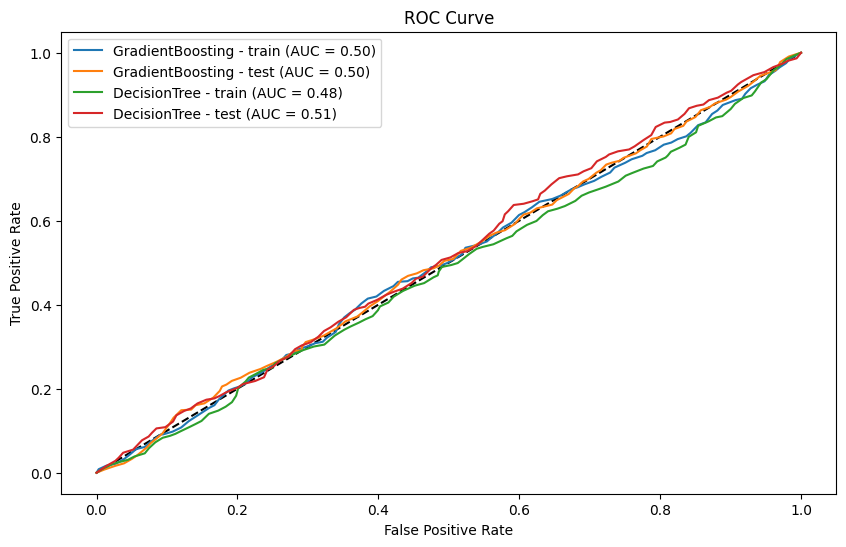

In [16]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')

unique_models = df_class['model'].unique()
unique_parts = df_class['part'].unique()

for model in unique_models:
    for part in unique_parts:
        subset = df_class[(df_class['model'] == model) & (df_class['part'] == part)]
        fpr, tpr, _ = roc_curve(subset['Y_true'], subset['Y_pred_proba_1'])
        roc_auc = auc(fpr, tpr)
        
        label = f'{model} - {part} (AUC = {roc_auc:.2f})'
        plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()
#Здесь построил 4 рок кривые, добавил линию под 45 градусов(пунктирная)
#Сравнивая модели, получилось, что градиентный бустинг лучше работает на train данных